<a href="https://colab.research.google.com/github/SajjitMalla01/worksheet/blob/main/workshop_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")


In [6]:
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with your target column name
y = df['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)


In [10]:
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7922077922077922

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



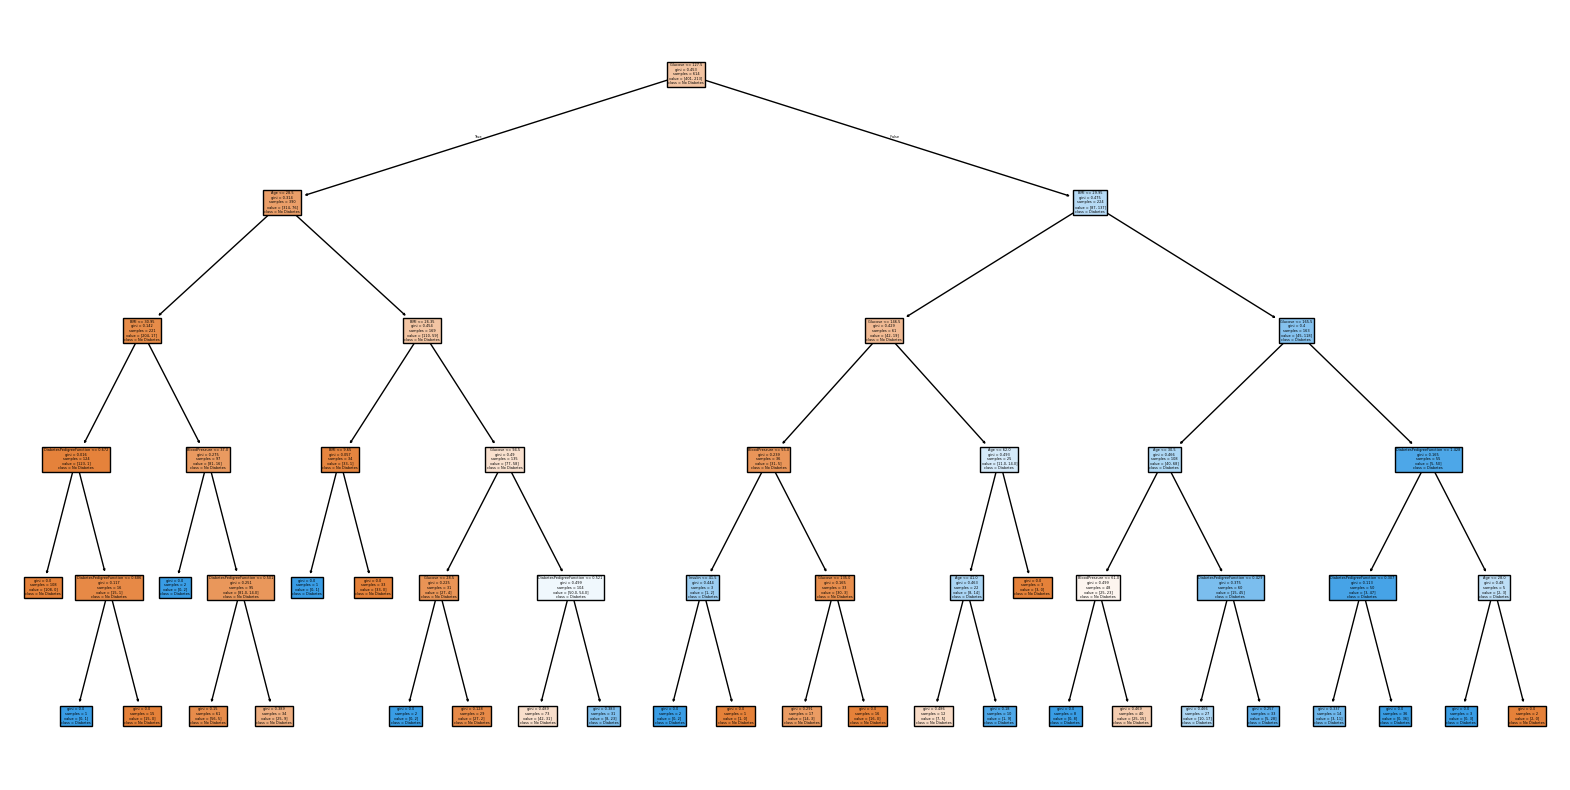

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

In [13]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 94.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |---

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7922077922077922
